# **Workflow**

1.Load Data

2.Data Understanding and Check Missing Values ( If Exist ; Fill each record with mean of its feature )

2.Feature engineeering and  feature selection


3.Standardized the Input Variables.


4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).


5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).


6.Compilation Step (Note : Its a classification problem , select loss , metrics according to it)


7.Train the Model with Epochs (100).


8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .


9.Prediction should be > 92%

10.Evaluation Step

11Prediction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics


In [2]:
import warnings
warnings.filterwarnings("ignore")

# **1.Load Data**

In [3]:
df = pd.read_csv("train.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the results
print("Numerical columns and their data types:")
print(df[numerical_cols].dtypes)
print("\nCategorical columns and their data types:")
print(df[categorical_cols].dtypes)

Numerical columns and their data types:
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Delay_from_due_date           int64
Num_Credit_Inquiries        float64
Credit_Utilization_Ratio    float64
Total_EMI_per_month         float64
dtype: object

Categorical columns and their data types:
ID                         object
Customer_ID                object
Month                      object
Name                       object
Age                        object
SSN                        object
Occupation                 object
Annual_Income              object
Num_of_Loan                object
Type_of_Loan               object
Num_of_Delayed_Payment     object
Changed_Credit_Limit       object
Credit_Mix                 object
Outstanding_Debt           object
Credit_History_Age         object
Payment_of_Min_Amount      object
Amount_invested_monthly    object
Payment_Behaviour          object
Mon

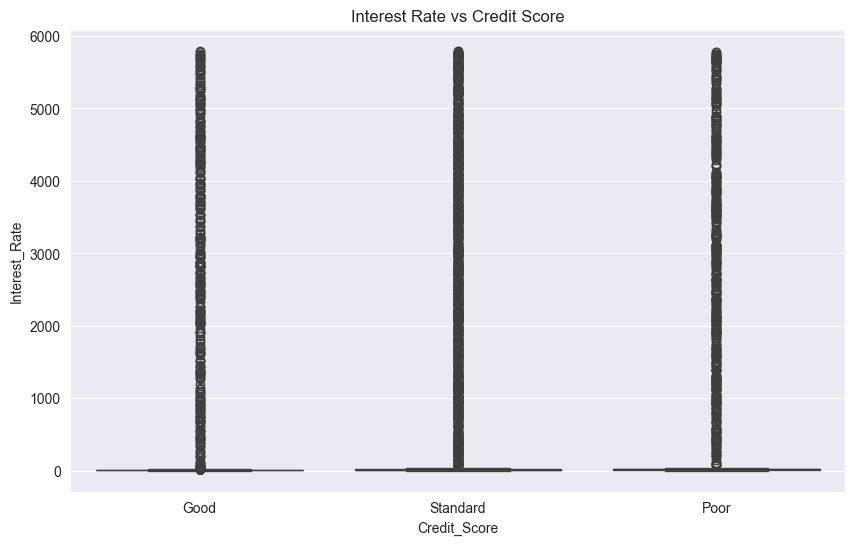

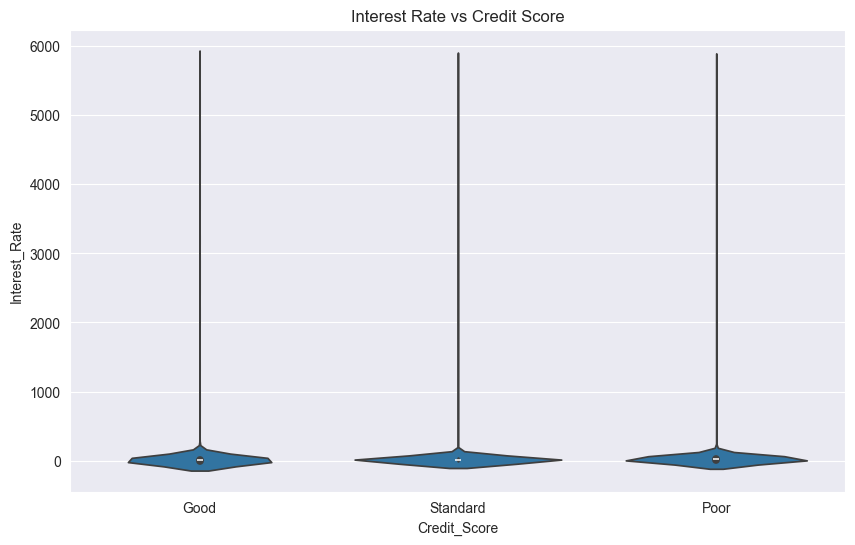

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df = pd.read_csv('your_data.csv') # Load your data

# Improved Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df)
plt.title('Interest Rate vs Credit Score')
plt.show()

# Improved Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_Score', y='Interest_Rate', data=df)
plt.title('Interest Rate vs Credit Score')
plt.show()


# **Data Understanding**

In [6]:
df.shape

(100000, 28)

In [7]:
#CHECK INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [9]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

# Print categorical columns
print("Categorical Columns:")
for col in cat_cols:
    print(col)

# Print numerical columns
print("\nNumerical Columns:")
for col in num_cols:
    print(col)
    df.dtypes

Categorical Columns:
ID
Customer_ID
Month
Name
Age
SSN
Occupation
Annual_Income
Num_of_Loan
Type_of_Loan
Num_of_Delayed_Payment
Changed_Credit_Limit
Credit_Mix
Outstanding_Debt
Credit_History_Age
Payment_of_Min_Amount
Amount_invested_monthly
Payment_Behaviour
Monthly_Balance
Credit_Score

Numerical Columns:
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Delay_from_due_date
Num_Credit_Inquiries
Credit_Utilization_Ratio
Total_EMI_per_month


#feature engineering and feature selection

In [10]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
summary_stats = numerical_features.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633330        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            

In [11]:
# Select categorical features
categorical_features = df.select_dtypes(include=['object'])

# Calculate descriptive statistics
descriptive_stats = categorical_features.describe()

# Display descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
            ID Customer_ID    Month    Name     Age        SSN Occupation  \
count   100000      100000   100000   90015  100000     100000     100000   
unique  100000       12500        8   10139    1788      12501         16   
top     0x1602   CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq         1           8    12500      44    2833       5572       7062   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                100000     100000           100000   
unique                 3635          4            13178   
top                       _   Standard    

In [12]:
df.info()
df.drop(columns=["ID", "Customer_ID", "Name", "SSN","Type_of_Loan","Occupation","Month"], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [13]:
df.info()
df.drop(columns=["Num_of_Delayed_Payment", "Num_Credit_Card", "Amount_invested_monthly", "Num_Bank_Accounts","Monthly_Balance", "Credit_History_Age"], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Annual_Income             100000 non-null  object 
 2   Monthly_Inhand_Salary     84998 non-null   float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   object 
 9   Changed_Credit_Limit      100000 non-null  object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [14]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Score
0,23,19114.12,1824.843333,3,4,3,11.27,4.0,_,809.98,26.822620,No,49.574949,High_spent_Small_value_payments,Good
1,23,19114.12,NaN,3,4,-1,11.27,4.0,Good,809.98,31.944960,No,49.574949,Low_spent_Large_value_payments,Good
2,-500,19114.12,NaN,3,4,3,_,4.0,Good,809.98,28.609352,No,49.574949,Low_spent_Medium_value_payments,Good
3,23,19114.12,NaN,3,4,5,6.27,4.0,Good,809.98,31.377862,No,49.574949,Low_spent_Small_value_payments,Good
4,23,19114.12,1824.843333,3,4,6,11.27,4.0,Good,809.98,24.797347,No,49.574949,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,7,2,23,11.5,3.0,_,502.38,34.663572,No,35.104023,High_spent_Large_value_payments,Poor
99996,25,39628.99,3359.415833,7,2,18,11.5,3.0,_,502.38,40.565631,No,35.104023,High_spent_Medium_value_payments,Poor
99997,25,39628.99,3359.415833,5729,2,27,11.5,3.0,Good,502.38,41.255522,No,35.104023,High_spent_Large_value_payments,Poor
99998,25,39628.99,3359.415833,7,2,20,11.5,3.0,Good,502.38,33.638208,No,35.104023,Low_spent_Large_value_payments,Standard


Some variables are obviously unnecesarry for the analysis, hereunder "ID", "Customer_ID", "Name","Type_of_Loan" and "SSN". These are removed to reduce the dimensionality of the data.

In [15]:
df.shape

(100000, 15)

In [16]:
df.duplicated().sum()

0

In [17]:
df.isna().sum()

Age                             0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Payment_Behaviour               0
Credit_Score                    0
dtype: int64

In [18]:
#Replace the missing values for numerical columns with mean
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean())
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Num_Credit_Inquiries'].mean())
df['Interest_Rate'] = df['Interest_Rate'].fillna(df['Interest_Rate'].mean())


In [ ]:
#df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].mean())
#df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].mean())
#df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean())
#df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].mean())
#df['Interest_Rate'] = df['Interest_Rate'].fillna(df['Interest_Rate'].mean())
#df['Num_Credit_Card'] = df['Num_Credit_Card'].fillna(df['Num_Credit_Card'].mean())
#df['Num_Credit_Card'] = df['Num_Credit_Card'].fillna(df['Num_Credit_Card'].mean())


In [19]:
df.isna().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

CLEANING OTHER COLUMNS

### Age

In [20]:
df["Age"].value_counts()

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64

In [21]:
df["Age"] = df["Age"].astype(str)
df["Age"] = df["Age"].str.replace("_", "")

In [22]:
df["Age"] = df["Age"].replace("nan", np.nan)
df["Age"] = pd.to_numeric(df["Age"])

In [23]:
df["Age"] = pd.to_numeric(df["Age"])

In [24]:
for i in range(len(df)):
    if df["Age"][i] > 100 or df["Age"][i] < 18 :
        df["Age"][i] = None

df['Age'] = df['Age'].fillna(0)  # Corrected indentation

<ul> Changes made <ul/>
    <li> The string "_" is removed from the entries </li>
    <li> The variable is casted as numeric </li>
    <li> Ages above 100 and below 18 are coded as missing and will be imputed later. This counts for 8.5% of the total observations </li>

###  Annual Income

In [25]:
df["Annual_Income"].value_counts()

Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933       1
Name: count, Length: 18940, dtype: int64

In [26]:
df["Annual_Income"] = df["Annual_Income"].str.replace("_", "")

In [27]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"])

In [28]:
df['Annual_Income'] = df['Annual_Income'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df['Annual_Income'] = df['Annual_Income'].astype(float)

<ul> Notes and changes <ul/>
    <li> The string "_" is removed from the entries </li>
     <li> The variable is casted as numeric </li>

### Monthly_Inhand_Salary

Nothing to be done

### 7 - Interest_Rate

In [29]:
df["Interest_Rate"].value_counts().sort_index()

Interest_Rate
1       2683
2       2465
3       2765
4       2589
5       4979
        ... 
5775       1
5776       1
5788       1
5789       1
5797       1
Name: count, Length: 1750, dtype: int64

In [ ]:
## if df["Interest_Rate"][i] > 100:
        #df["Interest_Rate"][i] = None

### 8 - Num_of_Loan

In [30]:
df["Num_of_Loan"].value_counts()

Num_of_Loan
3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: count, Length: 434, dtype: int64

In [31]:
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_", "")

In [32]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"])

In [33]:
for i in range(len(df)):
    if df["Num_of_Loan"][i] > 50 or df["Num_of_Loan"][i] == -100:
        df["Num_of_Loan"][i] = None

In [34]:
# Replace non-numeric values with NaN
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Convert the column to float
df['Num_of_Loan'] = df['Num_of_Loan'].astype(float)




df['Num_of_Loan'] = df['Num_of_Loan'].fillna(0)  # Corrected indentation

<ul> Notes and changes <ul/>
    <li> The string "_" is removed from the entries </li>
    <li> The variable is casted as numeric </li>
    <li> The value -100 is considered erronous and is set to NaN </li>
    <li> Values above 50 are considered erronous and is set to NaN </li>

### 10 - Delay_from_due_date

In [35]:
df["Delay_from_due_date"].value_counts().sort_index()

Delay_from_due_date
-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: count, Length: 73, dtype: int64

<ul> Notes and changes <ul/>
    <li> No changes are made </li>
    <li> Negative values are assumed to be upfront payments, although they might also be erronous.  </li>


### 12 - Changed_Credit_Limit

In [36]:
df["Changed_Credit_Limit"].value_counts().sort_index()

Changed_Credit_Limit
-0.01       4
-0.02       6
-0.03       3
-0.04       9
-0.05       5
         ... 
9.96       60
9.97       97
9.98       63
9.99       82
_        2091
Name: count, Length: 3635, dtype: int64

In [37]:
for i in range(len(df)):
    if df["Changed_Credit_Limit"][i] == "_" :
        df["Changed_Credit_Limit"][i] = None

In [38]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [39]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(0)

<ul> Notes and changes <ul/>
    <li> The value _ is considered erronous and is set to NaN </li>


### 13 - Num_Credit_Inquiries

In [40]:
df["Num_Credit_Inquiries"].value_counts().sort_index()

Num_Credit_Inquiries
0.0        6972
1.0        7588
2.0        8028
3.0        8890
4.0       11271
          ...  
2588.0        1
2589.0        2
2592.0        2
2594.0        1
2597.0        1
Name: count, Length: 1224, dtype: int64

<ul> Notes and changes <ul/>
    <li> None </li>

###  14 - Credit_Mix

In [41]:
df["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

<ul> Notes and changes <ul/>
    <li> None


### 15 - Outstanding_Debt

In [42]:
df["Outstanding_Debt"].value_counts().sort_index()

Outstanding_Debt
0.23      8
0.34      8
0.54      8
0.56      8
0.77      8
         ..
998.95    8
999.12    8
999.25    8
999.36    8
999.48    8
Name: count, Length: 13178, dtype: int64

In [43]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_", "")

In [44]:
df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"])

In [45]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

<ul> Notes and changes <ul/>
    <li> The string "_" is removed from the entries </li>
    <li> The variable is casted as numeric </li>

### 16 - Credit_Utilization_Ratio

In [46]:
df["Credit_Utilization_Ratio"].value_counts()

Credit_Utilization_Ratio
26.407909    2
33.163023    2
26.822620    1
30.462162    1
33.933755    1
            ..
38.730069    1
30.017515    1
27.279794    1
27.002436    1
34.192463    1
Name: count, Length: 99998, dtype: int64

<ul> Notes and changes <ul/>
    <li> None

### 18 - Payment_of_Min_Amount

In [47]:
df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

<ul> Notes and changes <ul/>
    <li> None

### 19 - Total_EMI_per_month

In [48]:
df["Total_EMI_per_month"].value_counts().sort_index()

Total_EMI_per_month
0.000000        10613
4.462837            8
4.713184            8
4.865690            8
4.916139            8
                ...  
82193.000000        1
82204.000000        1
82236.000000        1
82256.000000        1
82331.000000        1
Name: count, Length: 14950, dtype: int64

<ul> Notes and changes <ul/>
    <li> None

### 21 - Payment_Behaviour

In [49]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [50]:
for i in range(len(df)):
    if df["Payment_Behaviour"][i] == "!@9#%8":
        df["Payment_Behaviour"][i] = "Other"

<ul> Notes and changes <ul/>
    <li> The value "x!@9#%8" is recoded to "Other" </li>

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Interest_Rate             100000 non-null  int64  
 4   Num_of_Loan               100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Changed_Credit_Limit      100000 non-null  float64
 7   Num_Credit_Inquiries      100000 non-null  float64
 8   Credit_Mix                100000 non-null  object 
 9   Outstanding_Debt          100000 non-null  float64
 10  Credit_Utilization_Ratio  100000 non-null  float64
 11  Payment_of_Min_Amount     100000 non-null  object 
 12  Total_EMI_per_month       100000 non-null  float64
 13  Payment_Behaviour         100000 non-null  ob

# **3.Standardized the Input Variables. **
# One hot encoding categoriccal ***data***

In [52]:
import pandas as pd

# Assuming df is your DataFrame

# Define the categorical columns and their respective categories
categorical_columns = {
    'Credit_Mix': ['Standard', 'Good', '_', 'Bad'],
    'Payment_Behaviour': ['Low_spent_Small_value_payments', 'High_spent_Medium_value_payments',
                           'Low_spent_Medium_value_payments', 'High_spent_Large_value_payments',
                           'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Other'],
    'Payment_of_Min_Amount': ['Yes', 'No', 'NM']
}

# Perform one-hot encoding for each categorical column
df_encoded = pd.DataFrame()
for column, categories in categorical_columns.items():
    encoded_column = pd.get_dummies(df[column])
    encoded_column.columns = [f"{column}_{category}" for category in categories[:len(encoded_column.columns)]]
    df_encoded = pd.concat([df_encoded, encoded_column], axis=1)

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(columns=categorical_columns.keys()), df_encoded], axis=1)

# Display the encoded DataFrame
print(df_encoded)


        Age  Annual_Income  Monthly_Inhand_Salary  Interest_Rate  Num_of_Loan  \
0      23.0       19114.12            1824.843333              3          4.0   
1      23.0       19114.12            4194.170850              3          4.0   
2       0.0       19114.12            4194.170850              3          4.0   
3      23.0       19114.12            4194.170850              3          4.0   
4      23.0       19114.12            1824.843333              3          4.0   
...     ...            ...                    ...            ...          ...   
99995  25.0       39628.99            3359.415833              7          2.0   
99996  25.0       39628.99            3359.415833              7          2.0   
99997  25.0       39628.99            3359.415833           5729          2.0   
99998  25.0       39628.99            3359.415833              7          2.0   
99999  25.0       39628.99            3359.415833              7          2.0   

       Delay_from_due_date 

In [53]:
scale_mapper = {"Poor":0, "Standard":1, "Good":2}
df["Credit_Score"] = df["Credit_Score"].replace(scale_mapper)


In [54]:
# Sample DataFrame (replace this with your actual DataFrame)
# Sample data with encoded values for 'Payment_of_Min_Amount' column
encoded_values = {
    'Yes': 1,
    'No': 2,
    'NM': 3,

}

# Map the categorical values to their corresponding encoded values
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(encoded_values)



In [55]:
# Sample DataFrame (replace this with your actual DataFrame)
# Sample data with encoded values for 'Credit_Mix' column
encoded_values = {
    '_': 1,
    'Good': 2,
    'Standard': 3,
    'Bad': 4
}

# Map the categorical values to their corresponding encoded values
df['Credit_Mix'] = df['Credit_Mix'].map(encoded_values)


In [56]:
# Sample DataFrame (replace this with your actual DataFrame)
# Sample data with encoded values for 'Payment_Behaviour' column
encoded_values = {
    'Low_spent_Small_value_payments': 1,
    'High_spent_Medium_value_payments': 2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6,
    'Other': 7
}

# Map the categorical values to their corresponding encoded values
df['Payment_Behaviour'] = df['Payment_Behaviour'].map(encoded_values)

# Display the DataFrame with the encoded values
print(df)

        Age  Annual_Income  Monthly_Inhand_Salary  Interest_Rate  Num_of_Loan  \
0      23.0       19114.12            1824.843333              3          4.0   
1      23.0       19114.12            4194.170850              3          4.0   
2       0.0       19114.12            4194.170850              3          4.0   
3      23.0       19114.12            4194.170850              3          4.0   
4      23.0       19114.12            1824.843333              3          4.0   
...     ...            ...                    ...            ...          ...   
99995  25.0       39628.99            3359.415833              7          2.0   
99996  25.0       39628.99            3359.415833              7          2.0   
99997  25.0       39628.99            3359.415833           5729          2.0   
99998  25.0       39628.99            3359.415833              7          2.0   
99999  25.0       39628.99            3359.415833              7          2.0   

       Delay_from_due_date 

In [57]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4.0,3,11.27,4.0,1,809.98,26.822620,2,49.574949,5,2
1,23.0,19114.12,4194.170850,3,4.0,-1,11.27,4.0,2,809.98,31.944960,2,49.574949,6,2
2,0.0,19114.12,4194.170850,3,4.0,3,0.00,4.0,2,809.98,28.609352,2,49.574949,3,2
3,23.0,19114.12,4194.170850,3,4.0,5,6.27,4.0,2,809.98,31.377862,2,49.574949,1,2
4,23.0,19114.12,1824.843333,3,4.0,6,11.27,4.0,2,809.98,24.797347,2,49.574949,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,7,2.0,23,11.50,3.0,1,502.38,34.663572,2,35.104023,4,0
99996,25.0,39628.99,3359.415833,7,2.0,18,11.50,3.0,1,502.38,40.565631,2,35.104023,2,0
99997,25.0,39628.99,3359.415833,5729,2.0,27,11.50,3.0,2,502.38,41.255522,2,35.104023,4,0
99998,25.0,39628.99,3359.415833,7,2.0,20,11.50,3.0,2,502.38,33.638208,2,35.104023,6,1


In [58]:
df.isnull().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

In [59]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4.0,3,11.27,4.0,1,809.98,26.822620,2,49.574949,5,2
1,23.0,19114.12,4194.170850,3,4.0,-1,11.27,4.0,2,809.98,31.944960,2,49.574949,6,2
2,0.0,19114.12,4194.170850,3,4.0,3,0.00,4.0,2,809.98,28.609352,2,49.574949,3,2
3,23.0,19114.12,4194.170850,3,4.0,5,6.27,4.0,2,809.98,31.377862,2,49.574949,1,2
4,23.0,19114.12,1824.843333,3,4.0,6,11.27,4.0,2,809.98,24.797347,2,49.574949,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,7,2.0,23,11.50,3.0,1,502.38,34.663572,2,35.104023,4,0
99996,25.0,39628.99,3359.415833,7,2.0,18,11.50,3.0,1,502.38,40.565631,2,35.104023,2,0
99997,25.0,39628.99,3359.415833,5729,2.0,27,11.50,3.0,2,502.38,41.255522,2,35.104023,4,0
99998,25.0,39628.99,3359.415833,7,2.0,20,11.50,3.0,2,502.38,33.638208,2,35.104023,6,1


In [60]:
import pandas as pd

def create_data_dictionary(df):
    data_dict = {}

    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Get data type of the column
        data_type = df[col].dtype

        # Get number of missing values in the column
        num_missing = df[col].isnull().sum()

        # Get number of unique values in the column
        num_unique = df[col].nunique()

        # Get top 5 most frequent values in the column
        top_values = df[col].value_counts().head().index.tolist()

        # Store column information in the data dictionary
        data_dict[col] = {
            'Data Type': data_type,
            'Number of Missing Values': num_missing,
            'Number of Unique Values': num_unique,
            'Top 5 Values': top_values
        }

    return data_dict

data_dict = create_data_dictionary(df)
for col, info in data_dict.items():
    print(f"Column Name: {col}")
    print(f"Data Type: {info['Data Type']}")
    print(f"Number of Missing Values: {info['Number of Missing Values']}")
    print(f"Number of Unique Values: {info['Number of Unique Values']}")
    print(f"Top 5 Values: {info['Top 5 Values']}")
    print("\n")

Column Name: Age
Data Type: float64
Number of Missing Values: 0
Number of Unique Values: 43
Top 5 Values: [0.0, 38.0, 28.0, 31.0, 26.0]


Column Name: Annual_Income
Data Type: float64
Number of Missing Values: 0
Number of Unique Values: 13613
Top 5 Values: [20867.67, 22434.16, 32543.38, 9141.63, 40341.16]


Column Name: Monthly_Inhand_Salary
Data Type: float64
Number of Missing Values: 0
Number of Unique Values: 13236
Top 5 Values: [4194.170849592996, 2295.058333, 6082.1875, 6769.13, 6358.956667]


Column Name: Interest_Rate
Data Type: int64
Number of Missing Values: 0
Number of Unique Values: 1750
Top 5 Values: [8, 5, 6, 12, 10]


Column Name: Num_of_Loan
Data Type: float64
Number of Missing Values: 0
Number of Unique Values: 23
Top 5 Values: [0.0, 3.0, 2.0, 4.0, 1.0]


Column Name: Delay_from_due_date
Data Type: int64
Number of Missing Values: 0
Number of Unique Values: 73
Top 5 Values: [15, 13, 8, 14, 10]


Column Name: Changed_Credit_Limit
Data Type: float64
Number of Missing Value

## checking for outliers

## **General Steps to Address the Issues**
# Identify and Remove Outliers: **bold text**

# Use statistical methods like IQR (Interquartile Range) to detect and handle outliers.
# **IQR is more robust and does not assume a specific distribution, making it suitable for skewed data.**

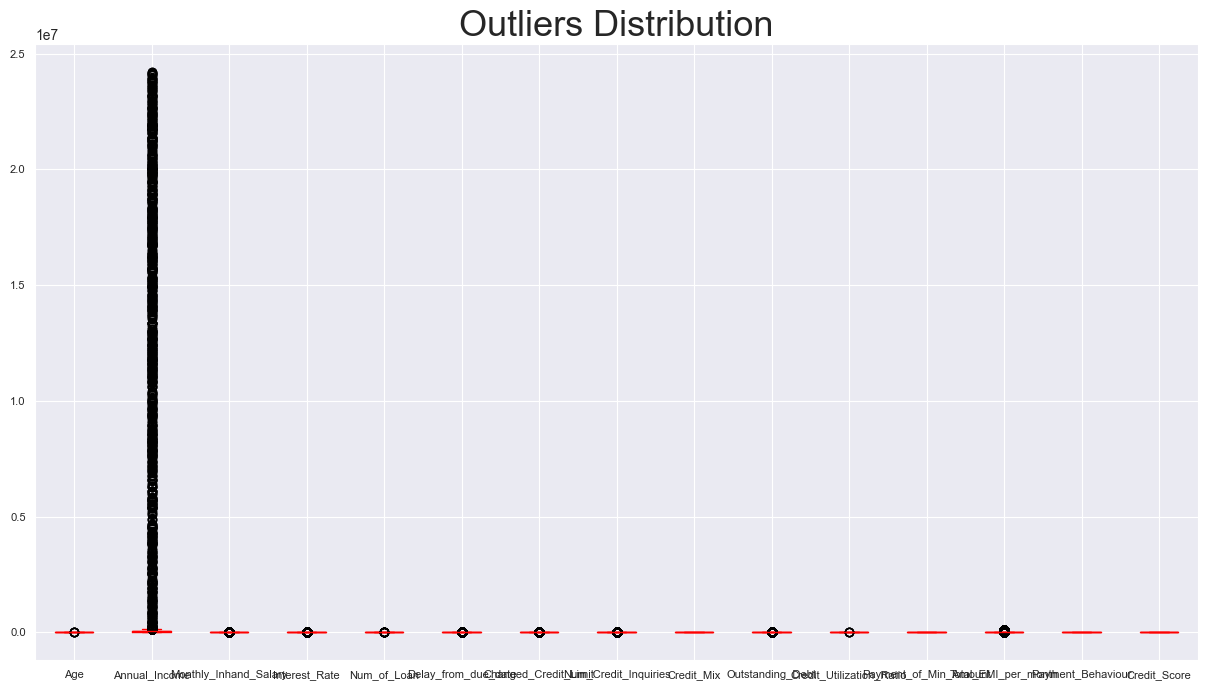

In [61]:
# checking for outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
df.boxplot(color='red', fontsize=8)
# Add title
plt.title("Outliers Distribution", fontsize=26)

plt.show()


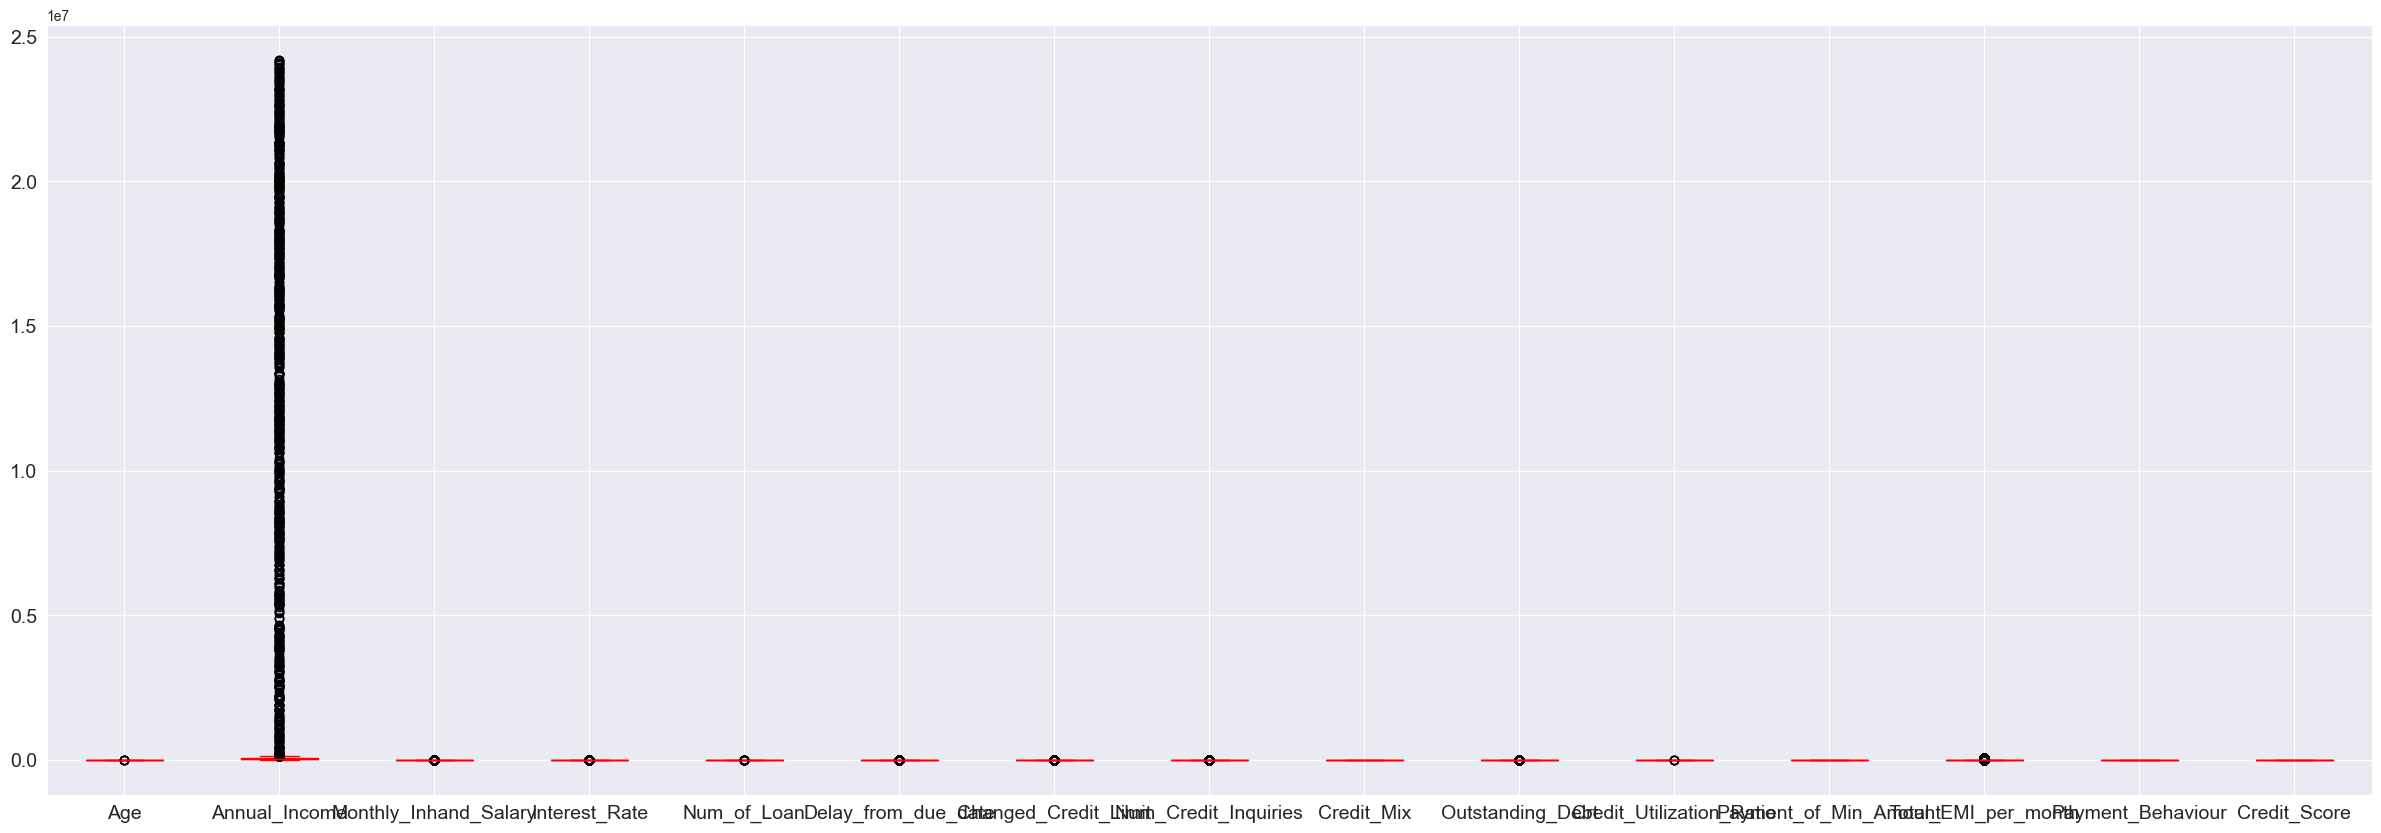

In [62]:
# checking for outliers
plt.figure(figsize=(30,10))
df.boxplot(color='red',fontsize=14)
plt.show()

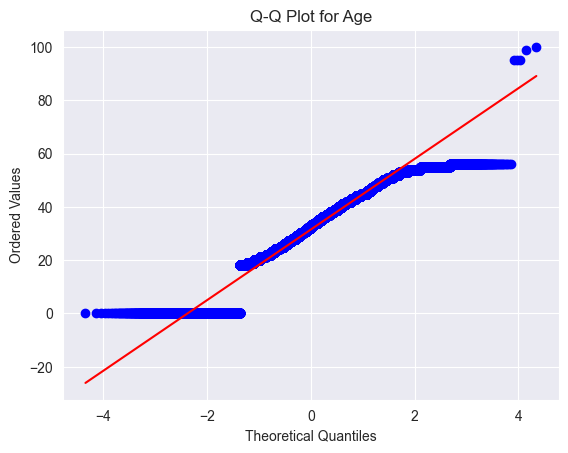

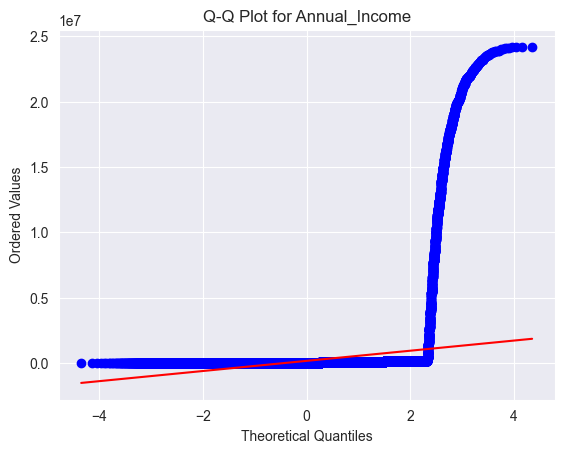

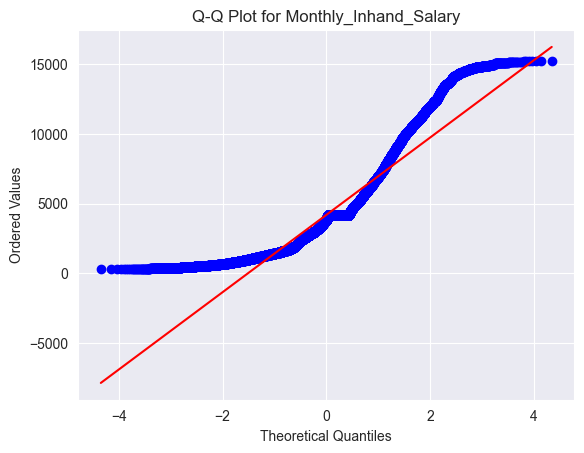

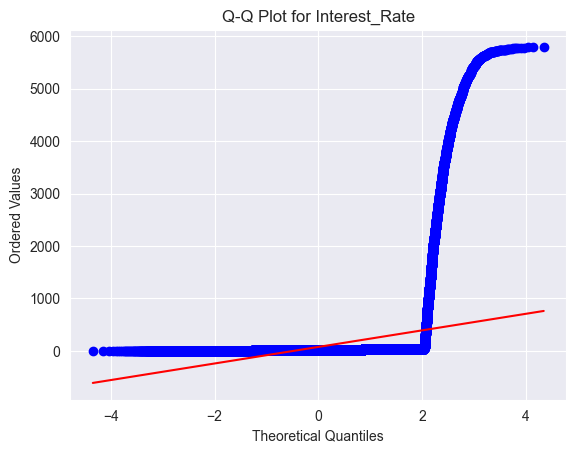

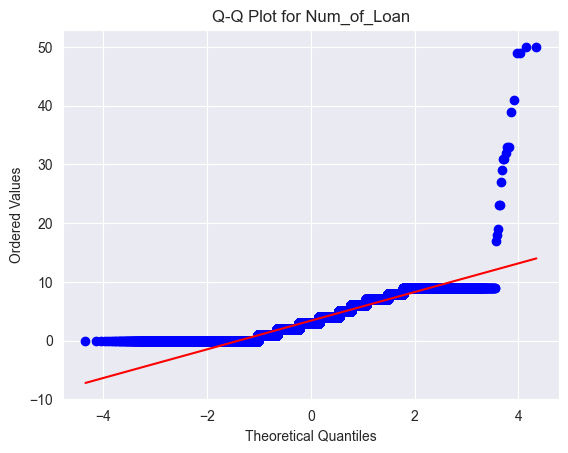

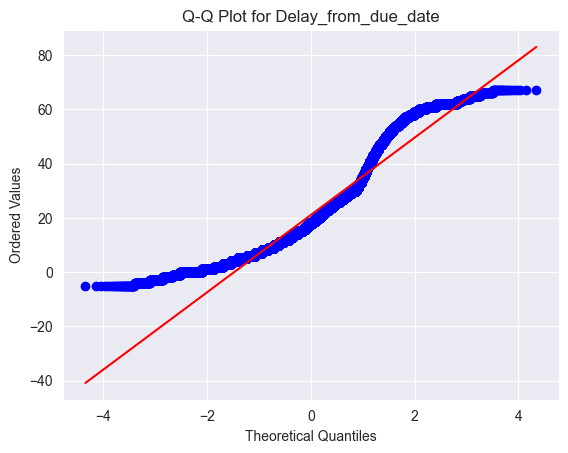

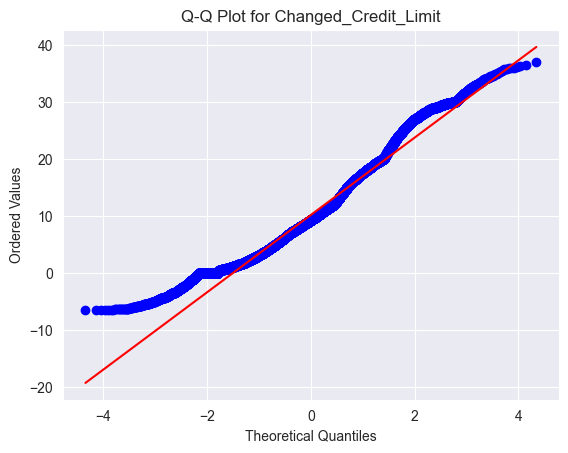

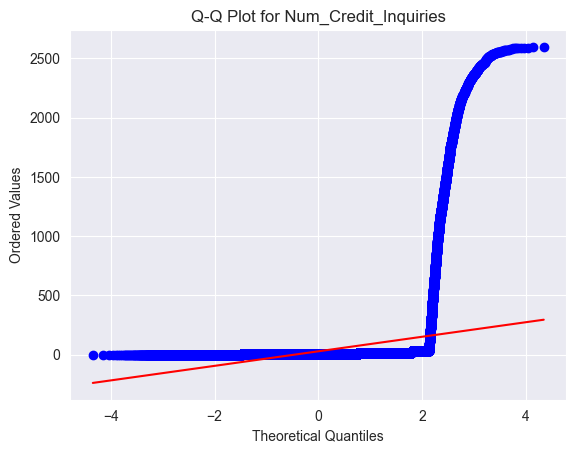

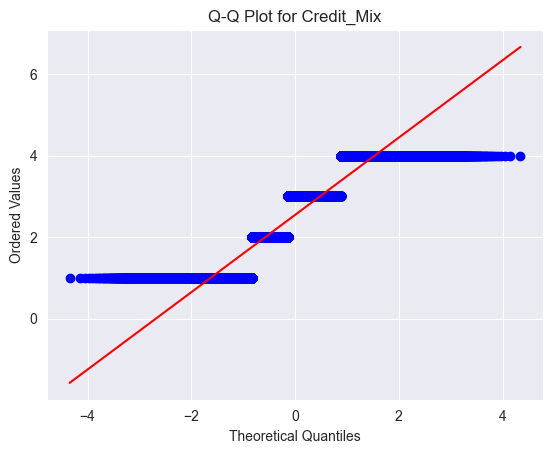

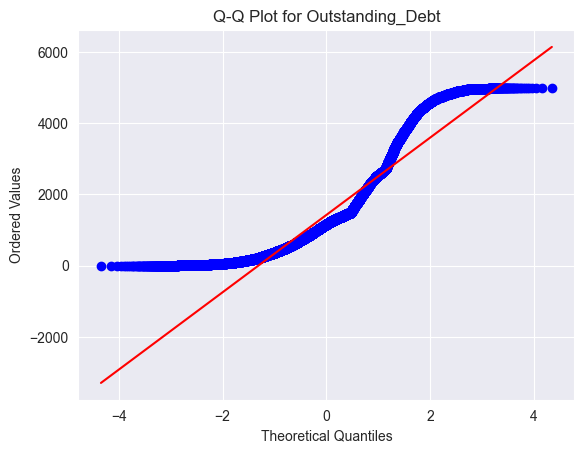

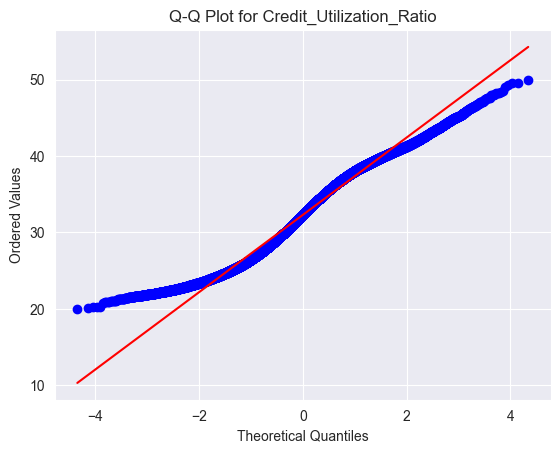

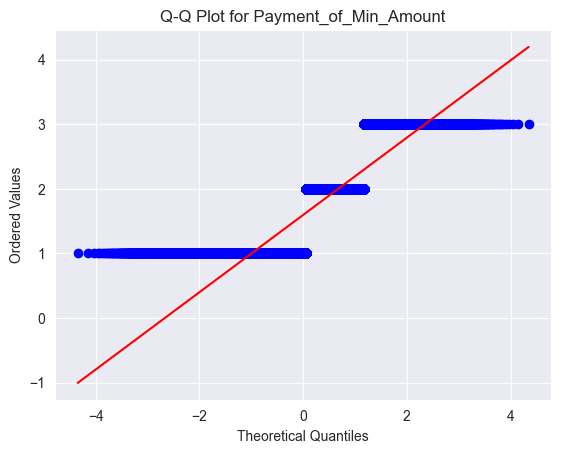

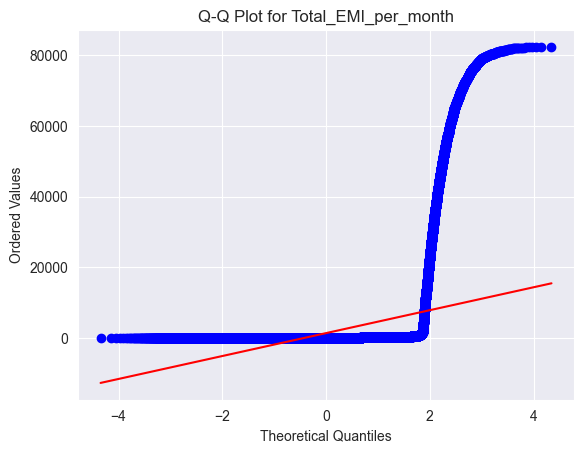

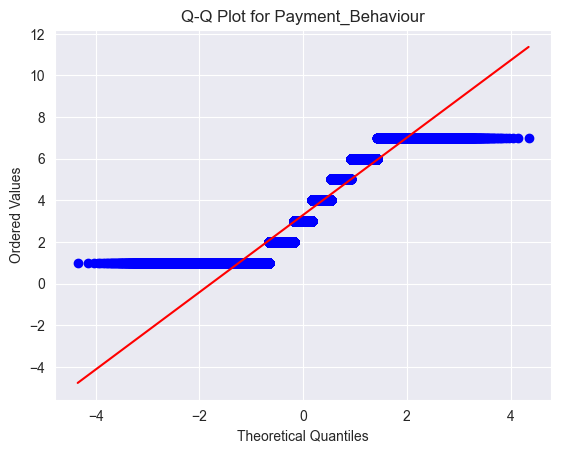

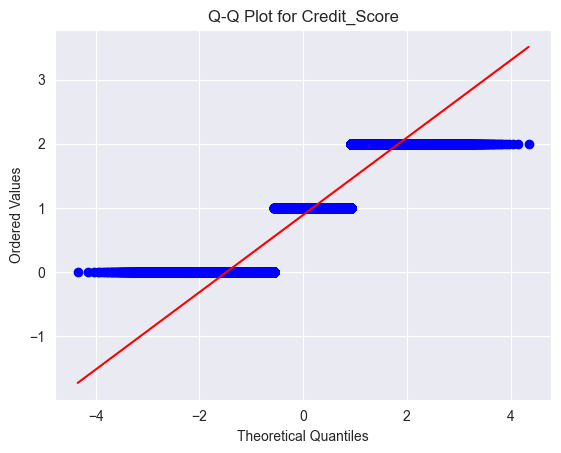

In [63]:
import scipy.stats as stats
import numpy as np

# Generate Q-Q plots for each numerical column
for col in df.select_dtypes(include=np.number):
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.show()


In [64]:
# Select numeric columns excluding encoded features
numeric_columns = df.select_dtypes(include=[np.number]).columns
encoded_features = ['Credit_Mix','Payment_Behaviour','Credit_Score','Payment_of_Min_Amount']  # Replace with your actual encoded features
numeric_columns = [col for col in numeric_columns if col not in encoded_features]

# Initialize a boolean mask for outliers
mask = pd.Series([True] * df.shape[0])

# Calculate IQR for each numeric column and update the mask
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    mask &= (df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))

# Filter out the outliers
df_no_outliers_iqr = df[mask]

print("DataFrame after removing outliers using IQR:")
print(df_no_outliers_iqr)


DataFrame after removing outliers using IQR:
        Age  Annual_Income  Monthly_Inhand_Salary  Interest_Rate  Num_of_Loan  \
0      23.0       19114.12            1824.843333              3          4.0   
1      23.0       19114.12            4194.170850              3          4.0   
2       0.0       19114.12            4194.170850              3          4.0   
3      23.0       19114.12            4194.170850              3          4.0   
4      23.0       19114.12            1824.843333              3          4.0   
...     ...            ...                    ...            ...          ...   
99994  25.0       39628.99            3359.415833              7          2.0   
99995  25.0       39628.99            3359.415833              7          2.0   
99996  25.0       39628.99            3359.415833              7          2.0   
99998  25.0       39628.99            3359.415833              7          2.0   
99999  25.0       39628.99            3359.415833              7

In [ ]:
from scipy import stats
import numpy as np

#z_scores = stats.zscore(df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean()))
#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3)
#df = df[filtered_entries]


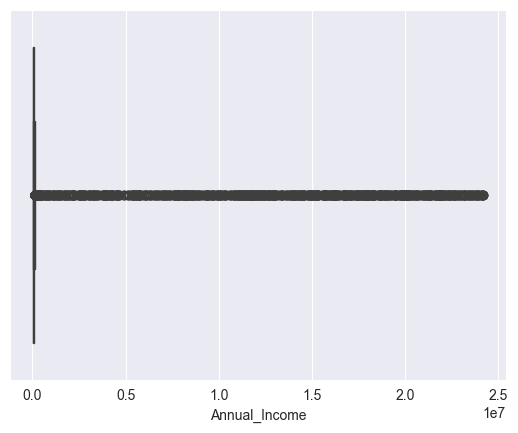

In [65]:
#Visualize Data:
#Use visualizations (box plots, histograms) to identify and understand the distribution and detect outliers.
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Annual_Income'])
plt.show()


# Model and visualization


<Axes: title={'center': 'Heatmap for the whole dataset'}>

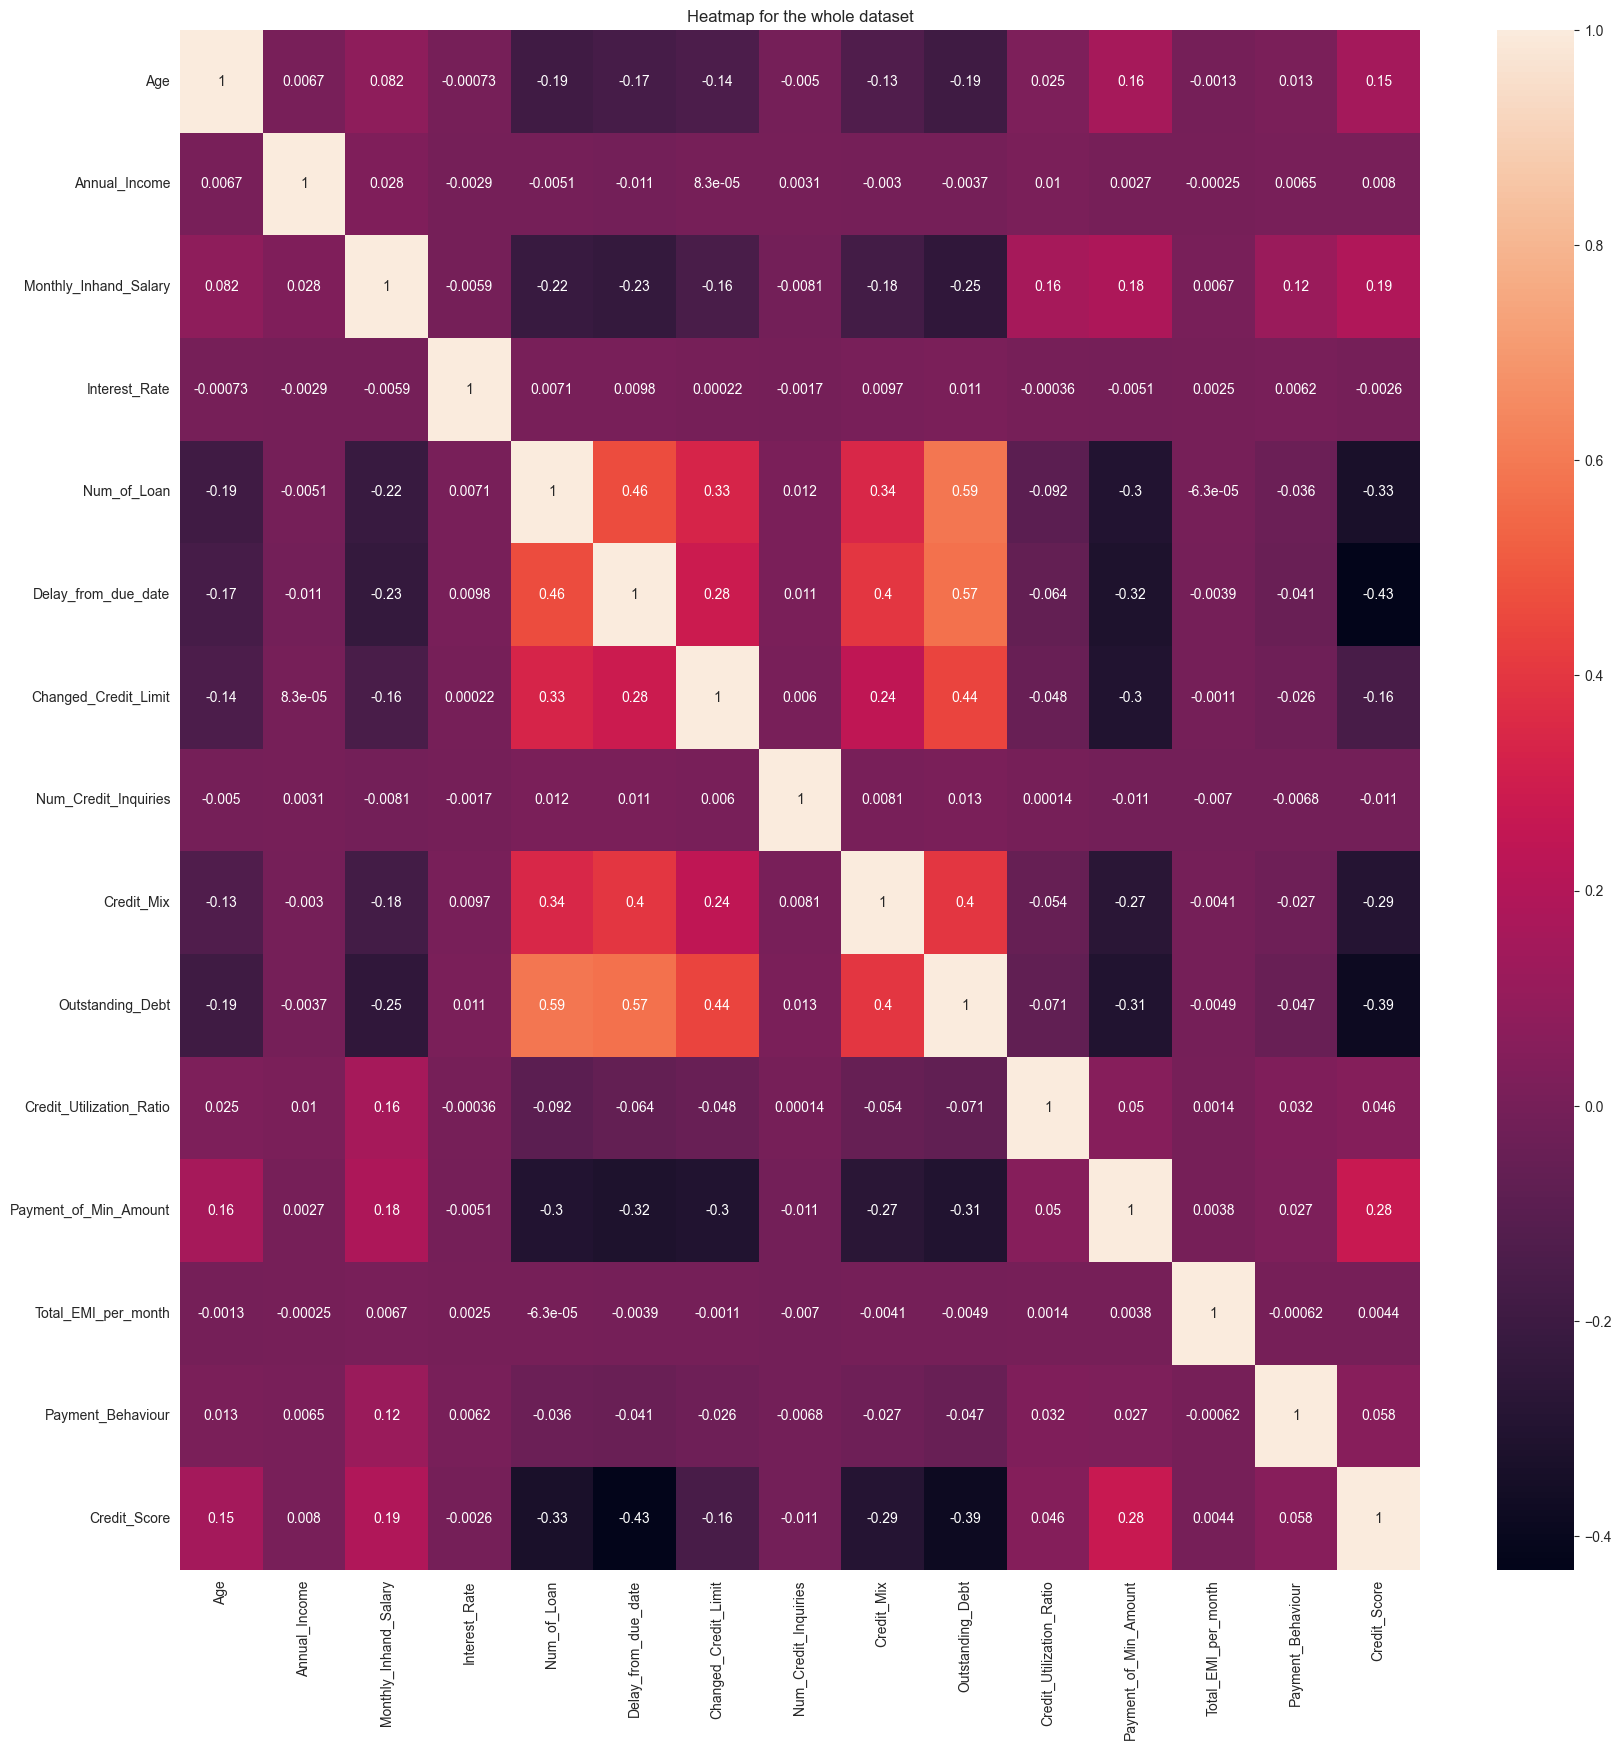

In [66]:
i=df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(20,20))
plt.title('Heatmap for the whole dataset')
sns.heatmap(i, annot=True)

### **Exploratory Data Analysis**

# **i. Univariate Analysis**

In [67]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

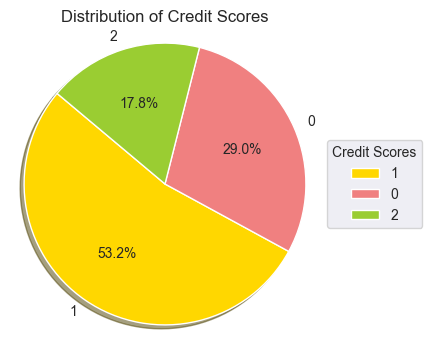

In [68]:
credit_score_counts = df['Credit_Score'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(credit_score_counts, labels=credit_score_counts.index, autopct='%1.1f%%',
                                   colors=['gold', 'lightcoral', 'yellowgreen', 'lightskyblue'], shadow=True, startangle=140)

# Adding a legend
plt.legend(wedges, credit_score_counts.index, title="Credit Scores", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Credit Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **ii.Bivariate Analysis**

to investigate how the target variable relates to the other variables.

# **Graph to compare features and credit score**

"Poor":0, "Standard":1, "Good":2

<Axes: title={'center': 'Credit_Score by Age'}, xlabel='Age', ylabel='count'>

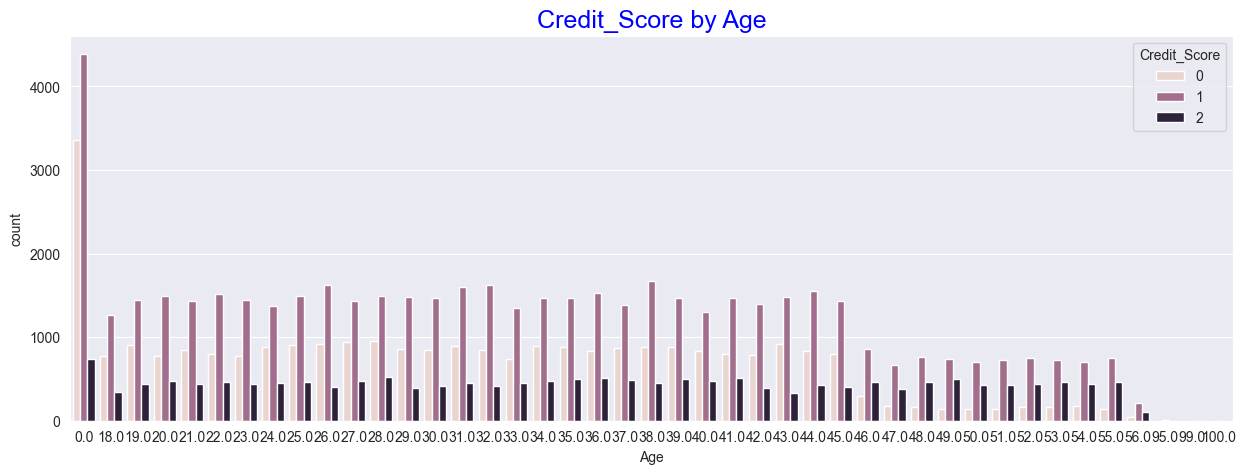

In [69]:
# Credit_Score by Age

plt.figure(figsize = (15, 5))
plt.title('Credit_Score by Age',fontsize=18,color="blue")
sns.countplot(data = df
            ,x = 'Age'
            ,hue = 'Credit_Score'
            )

<Axes: title={'center': 'Credit_Score by Payment_Behaviour'}, xlabel='Payment_Behaviour', ylabel='count'>

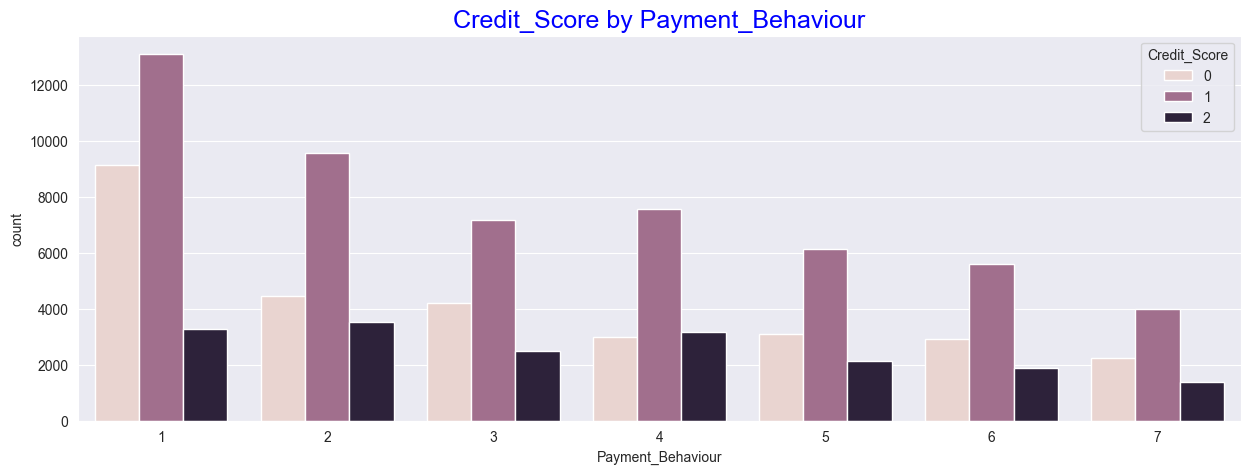

In [70]:
# Credit_Score by Payment_Behaviour

plt.figure(figsize = (15, 5))
plt.title('Credit_Score by Payment_Behaviour',fontsize=18,color="blue")
sns.countplot(data = df
            ,x = 'Payment_Behaviour'
            ,hue = 'Credit_Score'
            )

In [72]:
# Credit_Score by Annual_Income

plt.figure(figsize = (15, 5))
plt.title('Credit_Score by Annual_Income',fontsize=18,color="blue")
sns.countplot(data = df
            ,x = 'Annual_Income'
            ,hue = 'Credit_Score'
            )

<Axes: title={'center': 'Credit_Score by Annual_Income'}, xlabel='Annual_Income', ylabel='count'>

Error in callback <function flush_figures at 0x0000024AB8E0DE40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

# **A graph to compare payment behaviour and credit score**

     Low_spent_Small_value_payments': 1,
    'High_spent_Medium_value_payments': 2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6,
    'Other': 7

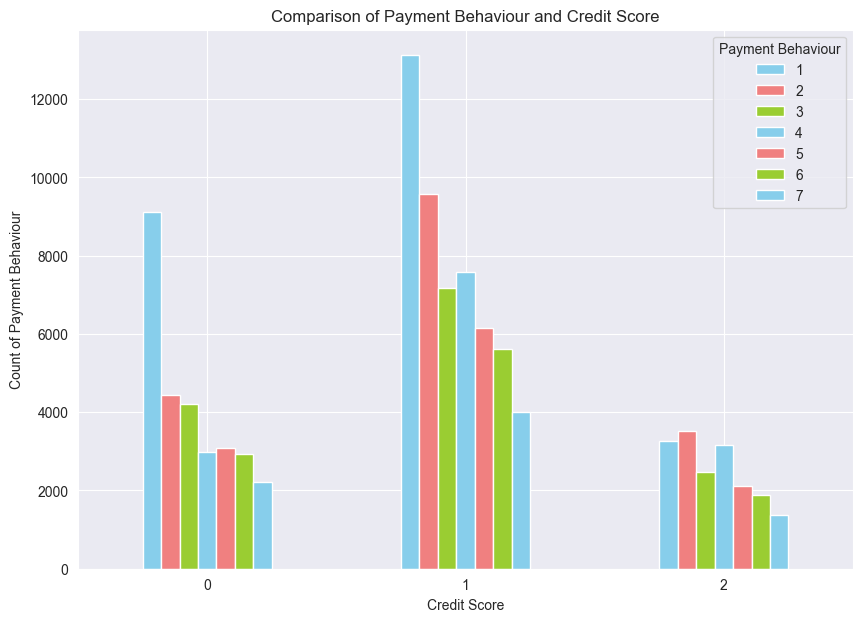

In [73]:
# Aggregating data for the bar chart
payment_behaviour_counts = df.groupby(['Credit_Score', 'Payment_Behaviour']).size().unstack()

# Plotting the bar chart
payment_behaviour_counts.plot(kind='bar', figsize=(10, 7), color=['skyblue', 'lightcoral', 'yellowgreen'])

plt.title('Comparison of Payment Behaviour and Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count of Payment Behaviour')
plt.xticks(rotation=0)
plt.legend(title='Payment Behaviour')
plt.show()

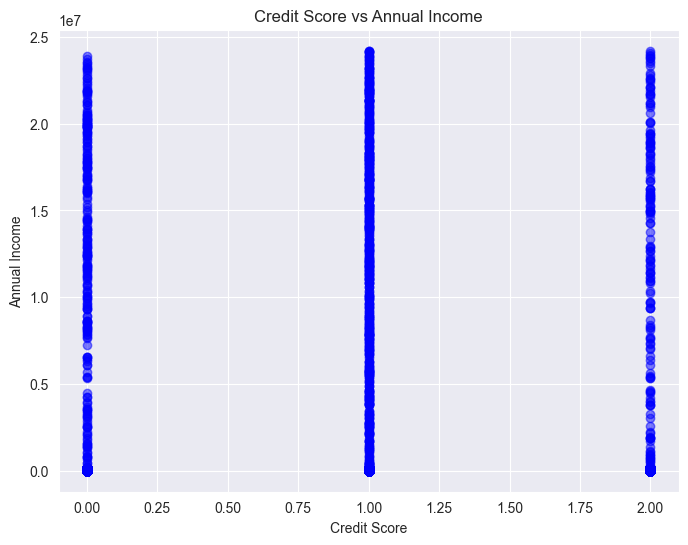

In [74]:
# Define the variable credit_score
Credit_score = df['Credit_Score']
Annual_Income = df['Annual_Income']
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Credit_score, Annual_Income, color='blue', alpha=0.5)
plt.title('Credit Score vs Annual Income')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

In [75]:
df1=df
df1

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.843333,3,4.0,3,11.27,4.0,1,809.98,26.822620,2,49.574949,5,2
1,23.0,19114.12,4194.170850,3,4.0,-1,11.27,4.0,2,809.98,31.944960,2,49.574949,6,2
2,0.0,19114.12,4194.170850,3,4.0,3,0.00,4.0,2,809.98,28.609352,2,49.574949,3,2
3,23.0,19114.12,4194.170850,3,4.0,5,6.27,4.0,2,809.98,31.377862,2,49.574949,1,2
4,23.0,19114.12,1824.843333,3,4.0,6,11.27,4.0,2,809.98,24.797347,2,49.574949,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,7,2.0,23,11.50,3.0,1,502.38,34.663572,2,35.104023,4,0
99996,25.0,39628.99,3359.415833,7,2.0,18,11.50,3.0,1,502.38,40.565631,2,35.104023,2,0
99997,25.0,39628.99,3359.415833,5729,2.0,27,11.50,3.0,2,502.38,41.255522,2,35.104023,4,0
99998,25.0,39628.99,3359.415833,7,2.0,20,11.50,3.0,2,502.38,33.638208,2,35.104023,6,1


In [78]:
df1 = df1.dropna()

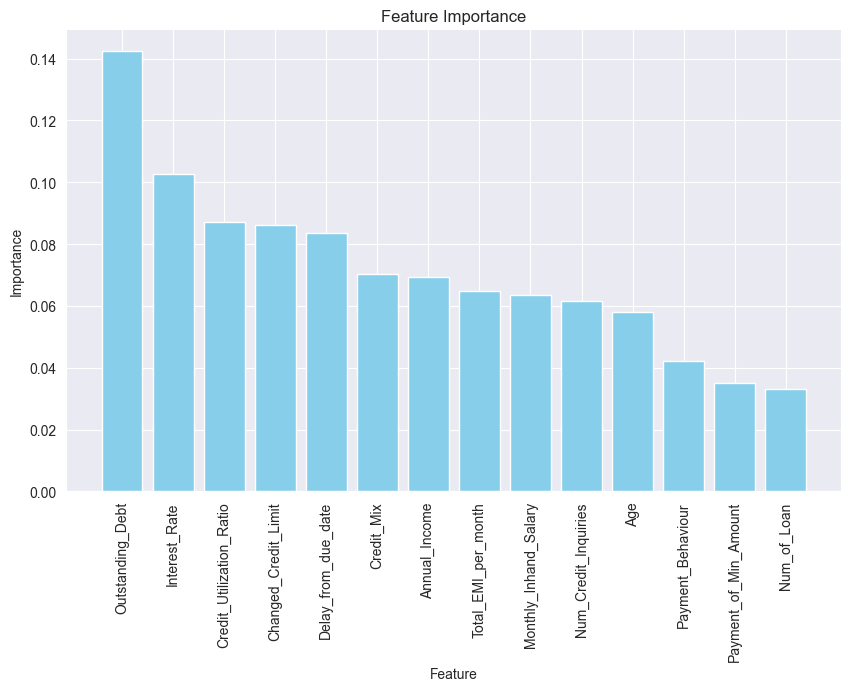

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_csv('train.csv')

# Assume the target variable is named 'target' and features are all other columns
X = df1.drop('Credit_Score', axis=1)
y = df1['Credit_Score']

# Train a Random Forest classifier (or any other model)
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df1 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df1['Feature'], feature_importance_df1['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


In [80]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

# Print categorical columns
print("Categorical Columns:")
for col in cat_cols:
    print(col)

# Print numerical columns
print("\nNumerical Columns:")
for col in num_cols:
    print(col)
    df.dtypes

Categorical Columns:
ID
Customer_ID
Month
Name
Age
SSN
Occupation
Annual_Income
Num_of_Loan
Type_of_Loan
Num_of_Delayed_Payment
Changed_Credit_Limit
Credit_Mix
Outstanding_Debt
Credit_History_Age
Payment_of_Min_Amount
Amount_invested_monthly
Payment_Behaviour
Monthly_Balance
Credit_Score

Numerical Columns:
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Delay_from_due_date
Num_Credit_Inquiries
Credit_Utilization_Ratio
Total_EMI_per_month


In [ ]:
# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Credit_Score', var_name='Feature', value_name='Value')

# Create a line plot for each feature
g = sns.FacetGrid(df_melted, col='Feature', col_wrap=2, sharey=False, height=4)
g.map(sns.lineplot, 'Credit_Score', 'Value')
g.add_legend()
g.set_axis_labels('Credit Score', 'Value')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Effect of All Features on Credit Score')

plt.show()

In [ ]:
# Calculate skewness for each numerical column in the DataFrame
skewness = df.skew()

# Print skewness for each column
print("Skewness for each column:")
print(skewness)


In [ ]:
import matplotlib.pyplot as plt

# Calculate skewness for each numerical column in the DataFrame
skewness = df.skew()

# Plot skewness values
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Data')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# Check for NaN values in the entire DataFrame
nan_values = df.isna().sum()

# Print out the columns with NaN values and their corresponding counts
print(nan_values[nan_values > 0])


# **DATA SPLITTING**

In [91]:
import tensorflow as tf
from keras import models, layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve




In [92]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979,Standard


In [93]:
# Assume 'data' and 'targets' are your dataset and labels
data = df.iloc[:, :-1]
targets = df.iloc[:,-1]

In [1]:
# Split the data
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.3, random_state=0)
train_data, validation_data, train_targets, validation_targets = train_test_split(train_data, train_targets, test_size=0.2, random_state=0)

NameError: name 'train_test_split' is not defined

In [95]:
# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)


ValueError: could not convert string to float: '0x1602'

In [88]:
from imblearn.combine import SMOTEENN
from collections import Counter

In [89]:
from imblearn.combine import SMOTEENN
from collections import Counter
# Apply SMOTE
smote = SMOTE(random_state=0)
smote_resampled_train_data, smote_resampled_train_targets = smote.fit_resample(train_data, train_targets)

# Print the SMOTE resampled class distribution
print('SMOTE resampled class distribution:', Counter(smote_resampled_train_targets))

# Apply SMOTE + ENN
smote_enn = SMOTEENN(random_state=0)
smote_enn_resampled_train_data, smote_enn_resampled_train_targets = smote_enn.fit_resample(train_data, train_targets)

# Print the SMOTE + ENN resampled class distribution
print('SMOTE + ENN resampled class distribution:', Counter(smote_enn_resampled_train_targets))

ValueError: could not convert string to float: '0x1c494'

In [ ]:
print(train_data.shape)

In [ ]:
train_data


# **HYBRID MODEL FOR RNNs AND FNNs**

In [90]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training, validation, and test sets
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.3, random_state=0)
train_data, validation_data, train_targets, validation_targets = train_test_split(train_data, train_targets, test_size=0.2, random_state=0)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=0)
smote_resampled_train_data, smote_resampled_train_targets = smote.fit_resample(train_data, train_targets)

# Print the SMOTE resampled class distribution
print('SMOTE resampled class distribution:', Counter(smote_resampled_train_targets))

# Apply SMOTE + ENN to balance the training data
smote_enn = SMOTEENN(random_state=0)
smote_enn_resampled_train_data, smote_enn_resampled_train_targets = smote_enn.fit_resample(train_data, train_targets)

# Print the SMOTE + ENN resampled class distribution
print('SMOTE + ENN resampled class distribution:', Counter(smote_enn_resampled_train_targets))

# Normalize the data
scaler = StandardScaler()
train_data_normalized = scaler.fit_transform(smote_enn_resampled_train_data)
validation_data_normalized = scaler.transform(validation_data)
test_data_normalized = scaler.transform(test_data)

# Convert targets to one-hot encoded format
num_classes = len(np.unique(targets))
train_targets_categorical = to_categorical(smote_enn_resampled_train_targets, num_classes=num_classes)
validation_targets_categorical = to_categorical(validation_targets, num_classes=num_classes)
test_targets_categorical = to_categorical(test_targets, num_classes=num_classes)

# Define LSTM input shape
time_steps = train_data_normalized.shape[1]  # or use a predefined value
features = 1  # Number of features per time step

# Reshape the data to (num_samples, time_steps, features) for LSTM input
train_data_reshaped = train_data_normalized.reshape((train_data_normalized.shape[0], time_steps, features))
validation_data_reshaped = validation_data_normalized.reshape((validation_data_normalized.shape[0], time_steps, features))
test_data_reshaped = test_data_normalized.reshape((test_data_normalized.shape[0], time_steps, features))

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(smote_enn_resampled_train_targets), y=smote_enn_resampled_train_targets)
class_weights = dict(enumerate(class_weights))

# Build the model
model = Sequential()

# LSTM part from the first model
model.add(LSTM(8, input_shape=(time_steps, features), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(LSTM(4, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))

# Flatten the output from LSTM layers to feed into Dense layers
model.add(Flatten())

# Dense layers from the second model
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Final output layer
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()



# Define the early stopping callback with patience
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Train the model with the early stopping callback

history = model.fit(train_data_reshaped, train_targets_categorical,
                    validation_data=(validation_data_reshaped, validation_targets_categorical),
                    epochs=300, batch_size=32, class_weight=class_weights,
                    callbacks=[early_stopping])


# Evaluate the model
loss, accuracy = model.evaluate(test_data_reshaped, test_targets_categorical)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Print the classification report
from sklearn.metrics import classification_report

predictions = model.predict(test_data_reshaped)
predictions_classes = np.argmax(predictions, axis=1)
test_targets_classes = np.argmax(test_targets_categorical, axis=1)

print("Test Set Classification Report:")
print(classification_report(test_targets_classes, predictions_classes, target_names=[str(i) for i in np.unique(targets)]))


ValueError: could not convert string to float: '0x1c494'

SAVING USING PICKLE

In [ ]:
import os
import pickle
from tensorflow.keras.models import save_model, load_model


In [ ]:
from tensorflow.keras.models import load_model

# Save the entire model to a file
model.save('lstm_model.h5')

# To load the model later
# loaded_model = load_model('lstm_model.h5')


In [ ]:
import pickle

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the training history
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


In [ ]:
# Load the scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Load the training history
with open('history.pkl', 'rb') as f:
    loaded_history = pickle.load(f)


In [ ]:
model.save('lstm_model.h5')